
# Diamonds Data Exploration


This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.


In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Load and Understand Data

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Data Meaning

**The 4 Cs of Diamonds:-**

**A) Carat**

Carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.
1 carat is equal to 0.2 grams

**B) Cut**

Diamond cuts are graded from ‘Excellent’ (or ‘Ideal’) at the top to ‘Fair’ at the bottom. Typically, trustworthy online sellers avoid diamonds below ‘Good’ cut quality. Among the 4Cs, cut stands out as the most crucial, significantly impacting the diamond’s beauty and radiance


**C) Color** 

Grading scale for diamonds in the normal color range used by internationally recognized laboratories (GIA & IGI for example). The scale ranges from D which is totally colorless to Z which is a pale yellow or brown color.

In our data we have Colorless with grads (D, E, F) and Near Colorless with grads (G, H, I and J)

Diamond colors more saturated than this scale are known as "fancy color" diamonds. Any light shade of diamond other than Light Yellow or Light Brown automatically falls out of the scale. For instance, a pale blue diamond won't get a "K", "N", or "S" color grade, it will get a Faint Blue, very Light Blue or Light Blue grade. 

**D) Clarity**

Clarity characteristics can affect the appearance and price of a loose diamond. Diamond Clarity Refers to the Absence of Inclusions (internal characteristics) and Blemishes (external characteristics)


   - **Flawless (FL)** No inclusions and no blemishes visible under 10x magnification
   - **Internally Flawless (IF)** No inclusions visible under 10x magnification
   - **Very, Very Slightly Included (VVS1 and VVS2)** Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
   - **Very Slightly Included (VS1 and VS2)** Inclusions are observed with effort under 10x magnification, but can be characterized as minor
   - **Slightly Included (SI1 and SI2)** Inclusions are noticeable under 10x magnification
   - **Included (I1, I2, and I3)** Inclusions are obvious under 10x magnification which may affect transparency and brilliance



**Dimensiona of Diamond:-**

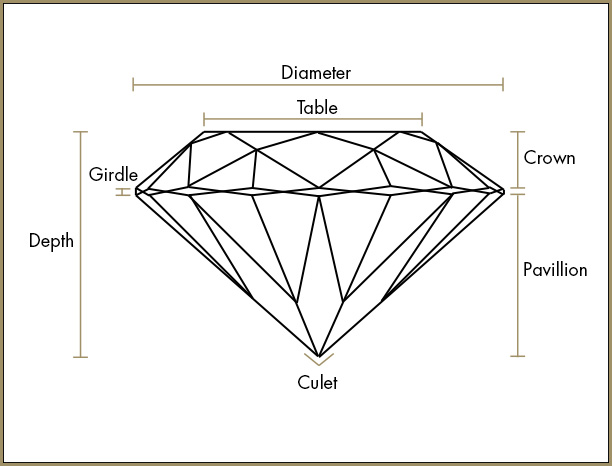

**Table**

The table of a diamond refers to its flat, top facet which is clearly visible when viewed from above. The ideal table percentage varies by shape. For a round cut diamond, an excellent table range is 54 and 57 and for a princess cut a table range of 69 to 75 percent of the width of the diamond is recommended.

**Depth**

Anothr factor to evaluate diamond is depth percentage, which shows how deep the diamond is in relation to its width.
The depth percentage is the ratio of the depth of the diamond, as measured from the table (the flat aspect of the diamond on top) to the culet (the tip or bottom of the diamond), compared to the total diameter of the diamond.

Dark looking nailheads and unsightly fish-eye effects are undesired consequences of bad depth proportions. Below are 2 such examples where things get really wonky when diamond depth is too deep or too shallow

|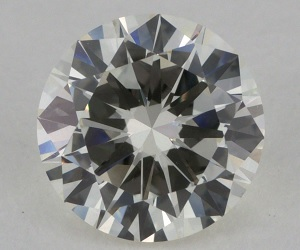   |  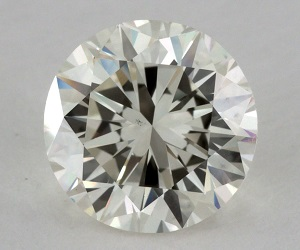|
|   -   |   -   |

<center>Total depth percentages of 56.6% (left) and 65.9 (right) are recipes for disastrous looks.<center>
 

<br/><br/> 

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

## Data Wrangling

### 1- Convert columns (cut, color and clarity) to category data type

In [9]:
df['cut'] = df['cut'].astype('category')

In [10]:
df['color'] = df['color'].astype('category')

In [11]:
df['clarity'] = df['clarity'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### 2- Remove and wrong dimension equal to Zero

In [13]:
df[df['z'] == 0].index

Int64Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
            24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
            49557, 51506],
           dtype='int64')

In [14]:
df.drop(df[df['z'] == 0].index, inplace = True)
df.drop(df[df['y'] == 0].index, inplace = True)
df.drop(df[df['x'] == 0].index, inplace = True)

In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


I am still worry about having <font color='red'> outlier </font> and we will discover it during doing EDA (Exploratory Data Analysis)

### EDA

**Check feature correlation with price**

In [16]:
dummies_df = pd.get_dummies(df)

In [17]:
dummies_df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


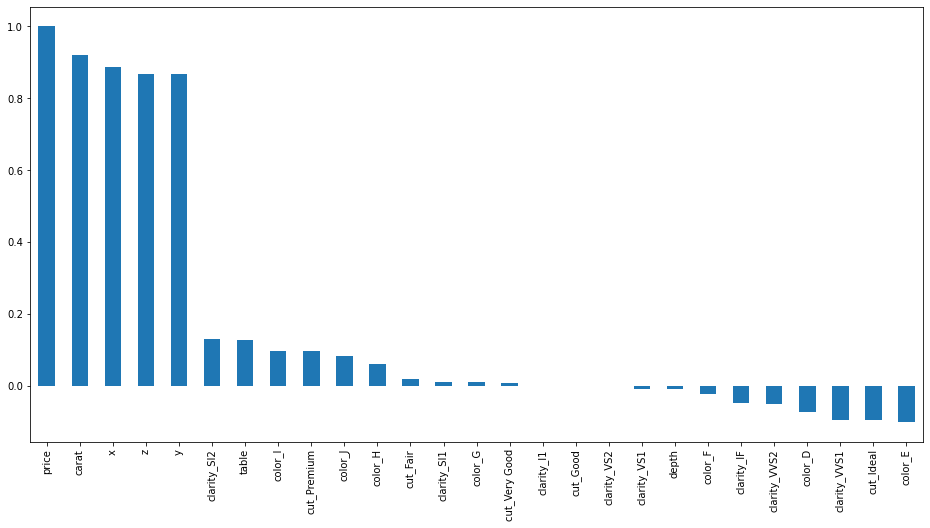

In [18]:
plt.figure(figsize=(16,8))
dummies_df.corr()['price'].sort_values(ascending= False).plot(kind='bar');

Did that meet your expextion?

- Diamond carat and its dimension has a clear positive correlation with its price.
- But it's stange for SI2 Slightly Included to be positive  correlation with price.
- having colorness D, E and F diamond not increasing the diamond price (opposite to my thoughts !!).


## Univariate Exploration

### Check price distribution

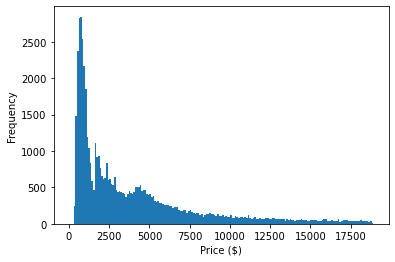

In [19]:
bins = np.arange(0, df['price'].max()+100, 100)
df['price'].plot(kind= 'hist', bins = bins)
plt.xlabel('Price ($)');

The graph has a left skweed with long tail this not because of outlier, so let change the scale

In [20]:
#check the value of log scale
np.log10(df['price'].describe())

count    4.731750
mean     3.594502
std      3.600677
min      2.513218
25%      2.977266
50%      3.380392
75%      3.726177
max      4.274689
Name: price, dtype: float64

In [21]:
10 ** np.arange( 2.5, 4.2 + 0.025 , 0.025 )

array([  316.22776602,   334.96543916,   354.81338923,   375.83740429,
         398.10717055,   421.69650343,   446.68359215,   473.15125896,
         501.18723363,   530.88444423,   562.34132519,   595.66214353,
         630.95734448,   668.34391757,   707.94578438,   749.89420933,
         794.32823472,   841.39514165,   891.25093813,   944.06087629,
        1000.        ,  1059.25372518,  1122.0184543 ,  1188.50222744,
        1258.92541179,  1333.52143216,  1412.53754462,  1496.23565609,
        1584.89319246,  1678.80401812,  1778.27941004,  1883.64908949,
        1995.26231497,  2113.48903984,  2238.72113857,  2371.37370566,
        2511.88643151,  2660.7250598 ,  2818.38293126,  2985.38261892,
        3162.27766017,  3349.65439158,  3548.13389234,  3758.37404288,
        3981.07170553,  4216.96503429,  4466.83592151,  4731.51258961,
        5011.87233627,  5308.84444231,  5623.4132519 ,  5956.62143529,
        6309.5734448 ,  6683.43917569,  7079.45784384,  7498.94209332,
      

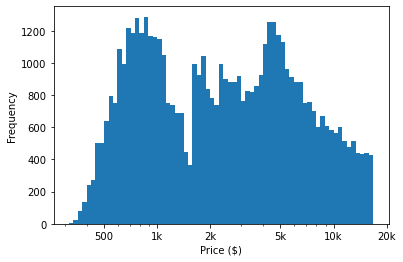

In [22]:
log_bins = 10 ** np.arange( 2.5, 4.2 + 0.025 , 0.025 )
df['price'].plot(kind= 'hist', bins = log_bins)
#plt.hist(data = df, x= 'price',  bins = log_bins)
#ticks= [300, 1000, 3000, 10000]
#labels = [str(i) for i in ticks]
plt.xscale('log')
#plt.xticks(ticks, labels)
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)');

we have a binominal distriution with one peak between 500 and 1000, and a second peak a little below 5000
there's a steep jump in frequency right before 2000, rather than a smooth ramp up.

### Check charat distribution

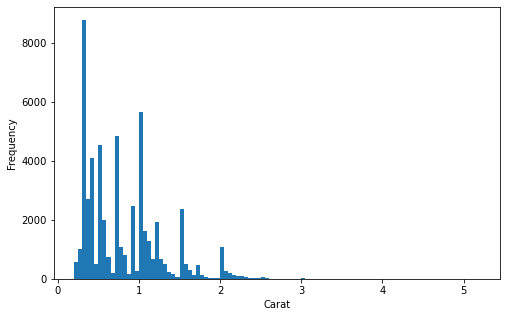

In [23]:
bins = np.arange(0.2, df['carat'].max()+0.2, 0.05)
plt.figure(figsize = [8,5])
df['carat'].plot(kind = 'hist', bins = bins)
plt.xlabel('Carat');

Most of diamond has Carat below 3, we will make the Max Carat is 3 and see the figure again

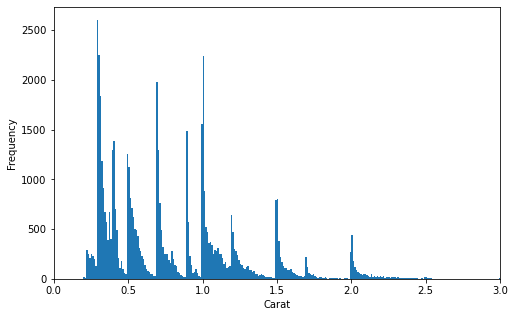

In [24]:
#Carat distibution below 3
bins = np.arange(0.2, 3+0.2, 0.01)
plt.figure(figsize = [8,5])
df['carat'].plot(kind = 'hist', bins = bins)
plt.xlim([0,3])
plt.xlabel('Carat');

After decresing the limit to 3 and make the bins size we noticed the high beaks that represent the most popular carat size
let do more foucus on smallaer size 

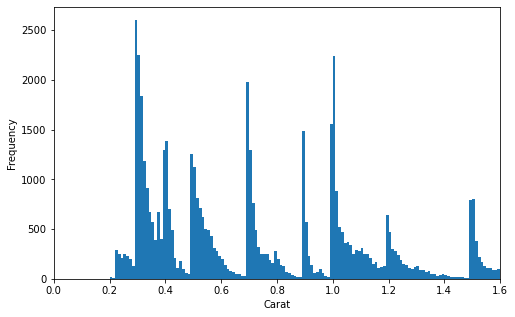

In [25]:
bins = np.arange(0.2, 1.6+0.01, 0.01)
plt.figure(figsize= [8,5])
df['carat'].plot(kind = 'hist', bins = bins)
plt.xlim([0,1.6])
plt.xlabel('Carat');

0.3, 0.5, 0.7, 0.9, 1 represent the most popular carat

## Check cut distribution

''

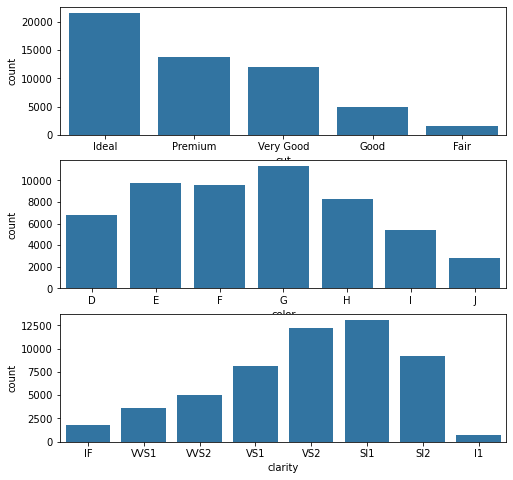

In [26]:
default_color = sns.color_palette()[0]
fig, axes = plt .subplots(nrows= 3, figsize = (8,8))
sns.countplot(data = df, x = 'cut',ax = axes[0], color =  default_color, order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
sns.countplot(data = df, x = 'color',ax = axes[1], color =  default_color, order = ['D', 'E', 'F', 'G', 'H', 'I', 'J'])
sns.countplot(data = df, x = 'clarity',ax = axes[2], color =  default_color, order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
;

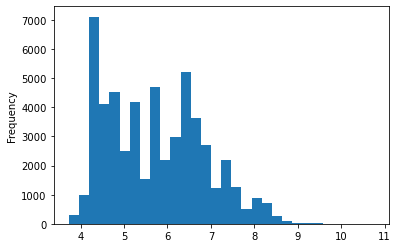

In [27]:
df['x'].plot(kind = 'hist', bins = 30)

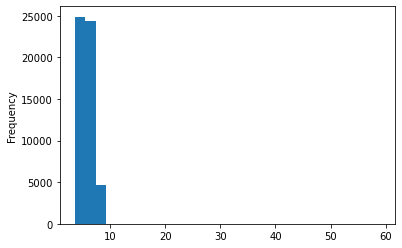

In [28]:
df['y'].plot(kind = 'hist', bins = 30)

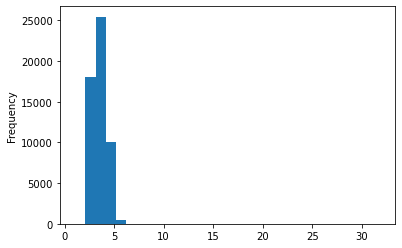

In [29]:
df['z'].plot(kind = 'hist', bins = 30)

We notice an outlier values for y and z dimensions

In [30]:
df[(df['y']>10) |  (df['z'] > 6)]

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26194,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
26431,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43


- Most of these values seems correct except three rows which have a large value for y and z
- We can do douple check
    - Since we have diamond dimensions (x, y and z) we can calculate depth ratio and campare it with depth in our data
    - As depth ratio may be equal (z/x) * 100 OR (z/y) * 100 
    - We can say depth ratio = (2*z) / (x+y) and compre the ruslt by suptracting it from depth in our data sheet
    - As we may have rounding the result of subraction will not equal zero
    - Afetr having absluote value, any result after subtacting has value > 0.1 will be considered as an inconsistent data
    
    

In [31]:
(2*df['z']) / (df['x']+df['y']) - df['depth']/100

0       -0.002137
1       -0.000329
2       -0.000034
3       -0.000038
4       -0.000089
           ...   
53935    0.000167
53936    0.000119
53937   -0.000134
53938   -0.000383
53939    0.000222
Length: 53920, dtype: float64

In [32]:
incorrect_depth  = (np.abs((2*df['z']) / (df['x']+df['y']) - df['depth']/100) >0.1)
incorrect_depth 

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53920, dtype: bool

In [33]:
df.loc[(np.abs(2*df['z']/ (df['x']+df['y']) - df['depth']/100) >0.1),]

,carat,cut,color,clarity,depth,table,price,x,y,z
2941,1.00,Very Good,J,SI2,62.8,63.0,3293,6.26,6.19,3.19
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
19502,1.57,Fair,H,VS1,67.3,66.0,8133,7.85,5.75,3.87
20694,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53
21654,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25849,2.00,Premium,G,SI1,59.0,62.0,14918,6.16,6.15,4.82


So we will remove all incosistency data points for safty

In [34]:
clear_dim = df.loc[~incorrect_depth, ]

In [35]:
clear_dim.shape[0]

53901

Now we have clear diamond data with missing data and no outlier

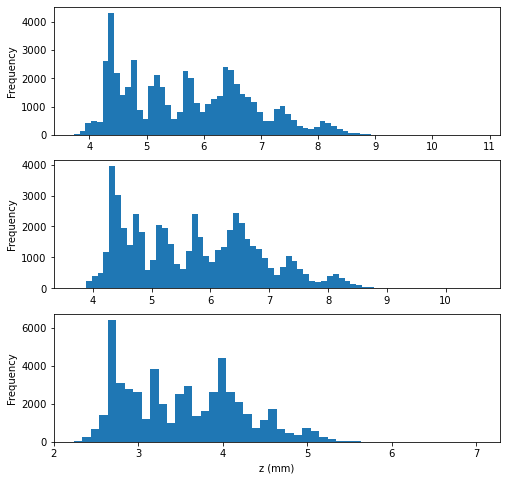

In [36]:
# re-plot the distribution of x, y, and z.
fig, axes = plt.subplots(nrows = 3 , figsize= [8,8])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(clear_dim[var]), max(clear_dim[var])+ 0.1, 0.1)
    clear_dim[var].plot(kind = 'hist', ax= axes[i], bins = bins)
    plt.xlabel(var + ' (mm)')


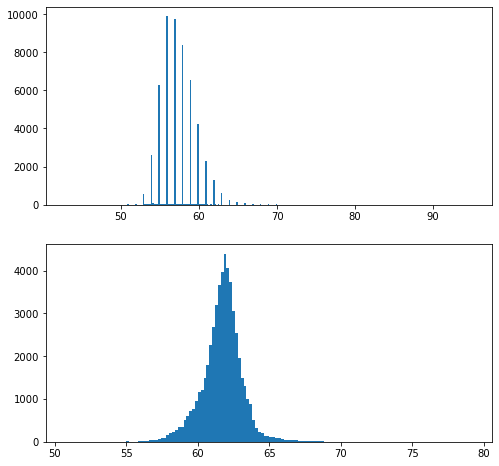

In [37]:
## Chech table and depth
fig, ax = plt.subplots(nrows = 2, figsize=[8,8])
features = ['table', 'depth']
for i in range(len(features)):
    feature = features[i]
    bins = np.arange(clear_dim[feature].min(), clear_dim[feature].max()+0.2, 0.2)
    #print(feature)
    ax[i].hist(data = clear_dim , x= feature, bins = bins );
    
plt.show()



Both table and depth are unimodal, but the distributions are slightly skewed and look a little narrower than a normal distribution. Table is slightly skewed right, while depth is slightly skewed left; I wonder if they're negatively correlated. Table is also a discrete numeric variable.


## Bivariate Exploration

In [38]:
numeric_vars = ['carat', 'price','depth','table', 'x', 'y', 'z']

In [39]:
categoric_vars = ['cut','color','clarity']

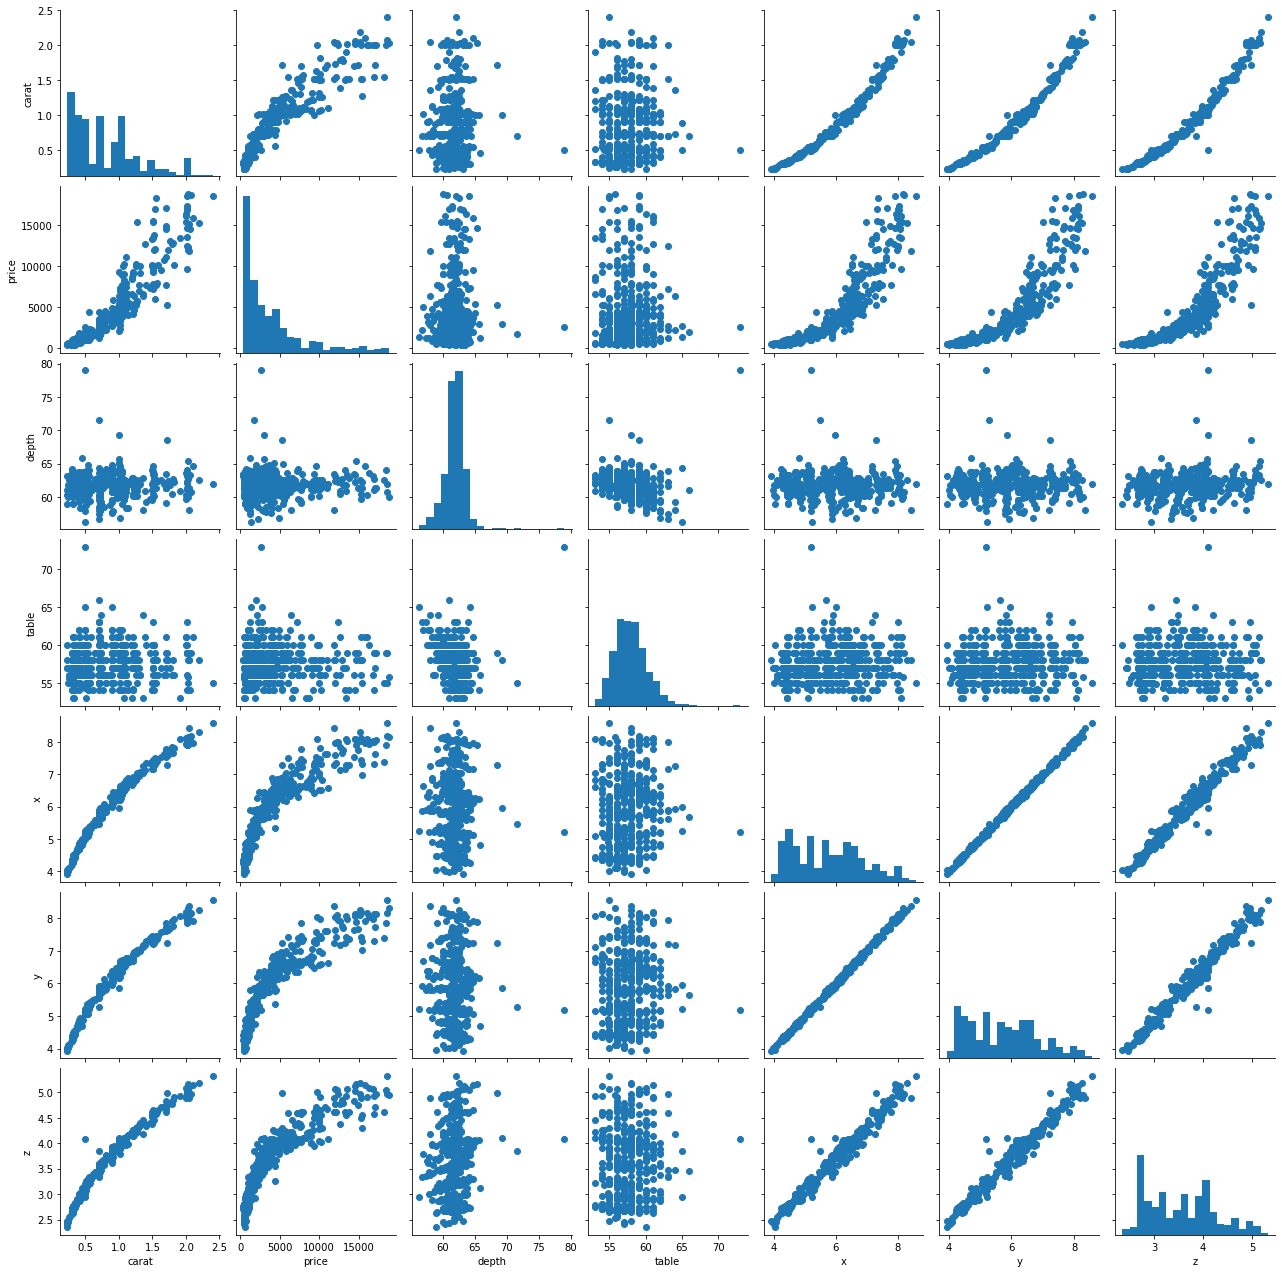

In [40]:
g= sns.PairGrid(data = clear_dim.sample(500), vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

In [41]:
samples =np.random.choice(clear_dim.shape[0], 500, replace = False)
dim_sample = clear_dim.iloc[samples,]

In [42]:
dim_sample

,carat,cut,color,clarity,depth,table,price,x,y,z
50680,0.73,Very Good,I,VS1,62.4,56.0,2288,5.72,5.76,3.58
24003,2.00,Premium,H,SI2,62.7,58.0,12168,8.06,8.01,5.04
8137,1.01,Very Good,F,SI2,63.4,56.0,4355,6.40,6.34,4.04
16920,1.41,Premium,J,VS2,62.7,56.0,6754,7.20,7.16,4.50
46880,0.53,Ideal,E,VS2,62.1,56.0,1813,5.20,5.17,3.22
...,...,...,...,...,...,...,...,...,...,...
8708,0.28,Ideal,H,VVS1,62.0,55.0,586,4.17,4.22,2.60
53642,0.70,Ideal,E,SI1,62.4,55.0,2703,5.66,5.69,3.54
41001,0.43,Ideal,G,VVS1,61.8,55.0,1183,4.87,4.90,3.02
11671,0.91,Very Good,E,VS1,62.8,60.0,5057,6.08,6.11,3.83


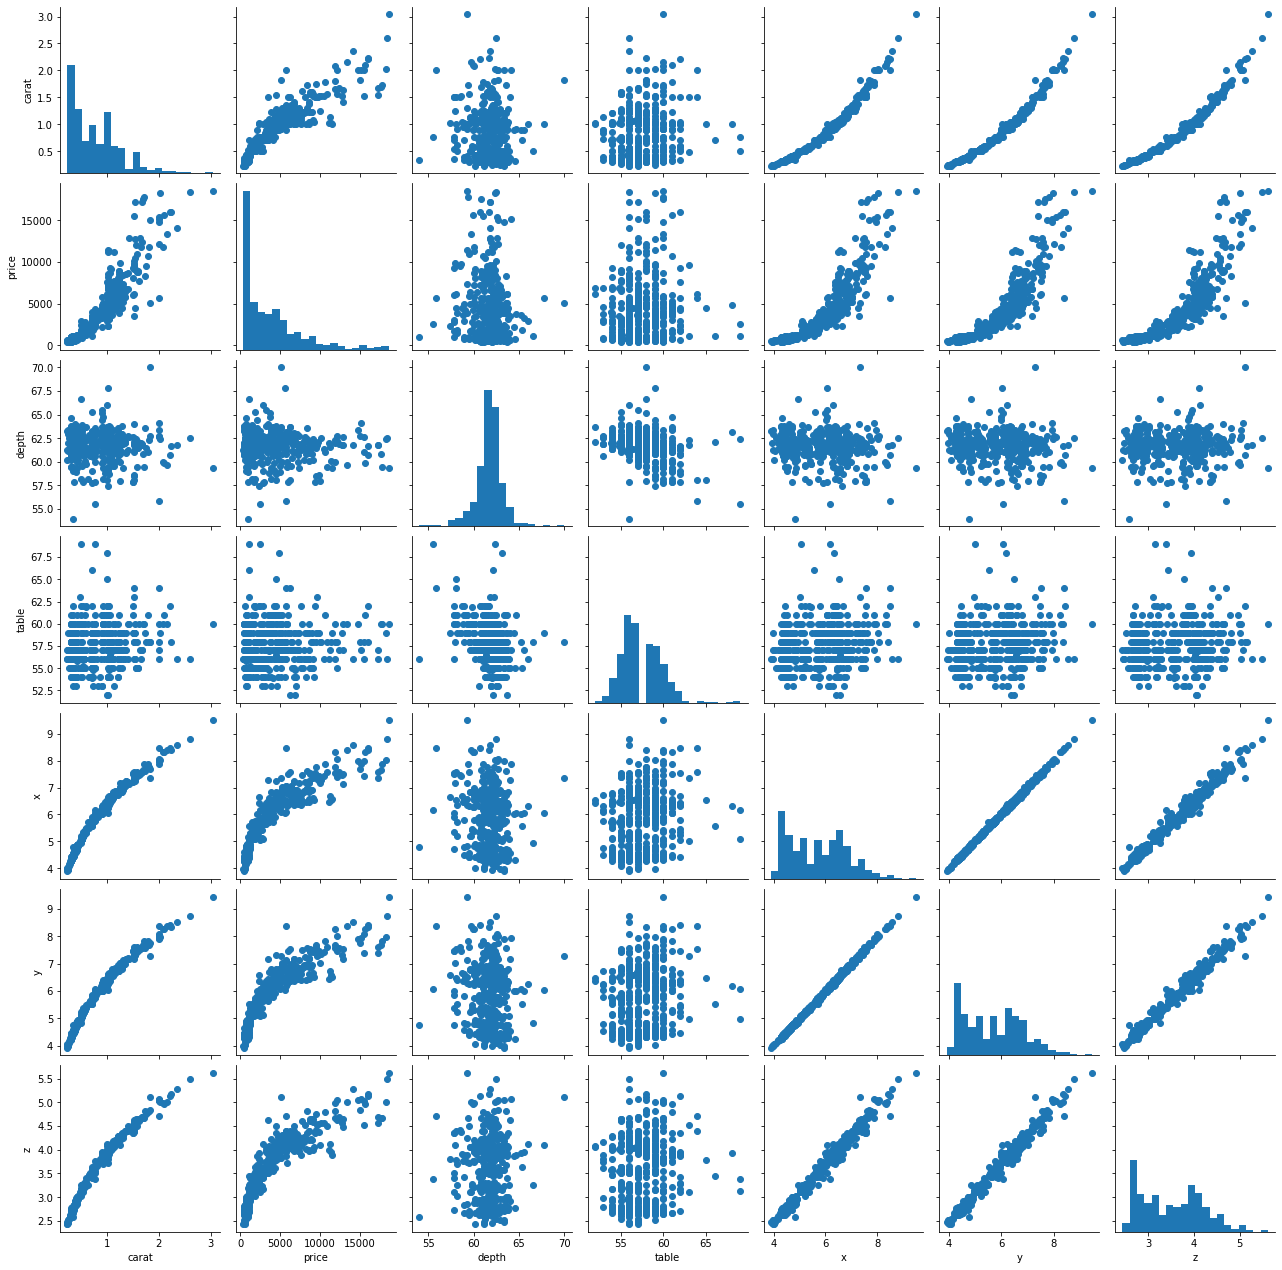

In [43]:
g=sns.PairGrid(data = dim_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

Some data points may be apeared as outliter when we take sample of data such points on the relation between  table and (x,y,z), we can don another check to make sure that no outliter

In [44]:
clear_dim[clear_dim['table'] < 50]

,carat,cut,color,clarity,depth,table,price,x,y,z
5979,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
11368,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
22701,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
35633,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65


In [45]:
clear_dim[clear_dim['depth'] > 68]

,carat,cut,color,clarity,depth,table,price,x,y,z
385,0.99,Fair,I,SI2,68.1,56.0,2811,6.21,6.06,4.18
839,0.96,Fair,F,SI2,68.2,61.0,2867,6.07,5.88,4.10
899,1.00,Fair,H,SI2,69.5,55.0,2875,6.17,6.10,4.26
1438,1.00,Fair,D,SI2,69.3,58.0,2974,5.96,5.87,4.10
1811,1.01,Fair,I,SI2,68.1,59.0,3054,6.14,6.11,4.17
...,...,...,...,...,...,...,...,...,...,...
52565,0.90,Fair,F,SI2,69.0,59.0,2536,5.89,5.82,4.04
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
53540,0.90,Fair,G,SI1,72.9,54.0,2691,5.74,5.67,4.16


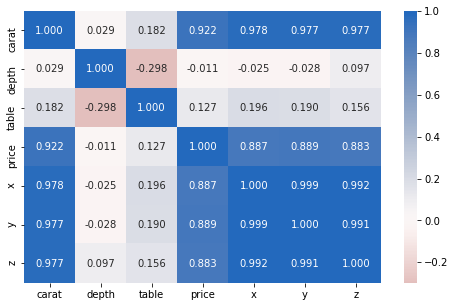

In [46]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(clear_dim.corr(),annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

<Figure size 720x720 with 0 Axes>

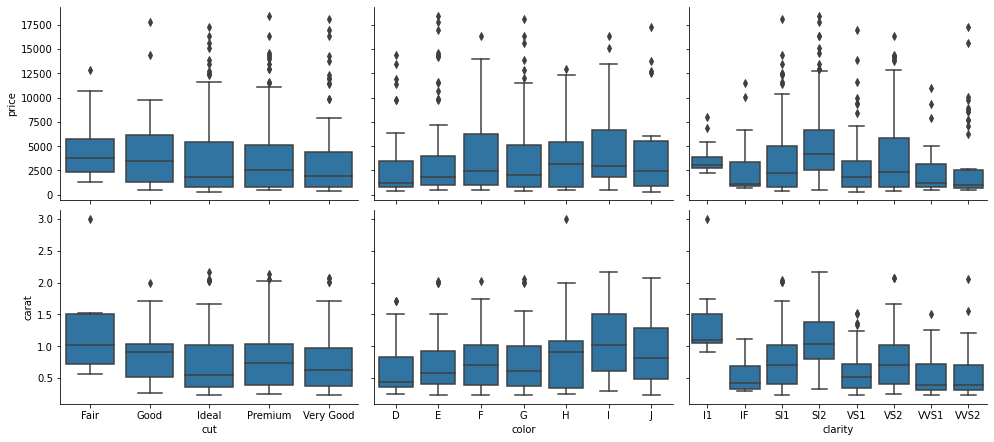

In [47]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
samples = np.random.choice(clear_dim.shape[0], 1500, replace = False)
diamonds_samp = clear_dim.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = clear_dim.sample(500), y_vars = ['price', 'carat'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid);
plt.show();

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the decrease in average price across increasing quality is due to the average diamond size decreasing with increasing quality. This is clearest in the plots across clarity, moderately visible with cut, and least evident with color. It will be interesting to see how the categories map in the multivariate analysis.

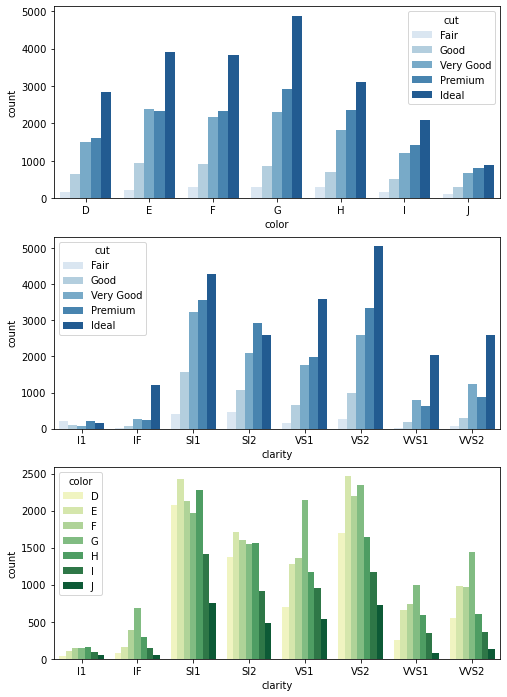

In [48]:
plt.figure(figsize = [8, 12])
cut_order =['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
plt.subplot(3,1,1)
sns.countplot(data = clear_dim, x = 'color', hue = 'cut', palette = 'Blues', hue_order = ['Fair','Good','Very Good', 'Premium', 'Ideal'])

plt.subplot(3,1,2)
sns.countplot(data = clear_dim, x = 'clarity', hue = 'cut', palette = 'Blues',  hue_order = ['Fair','Good','Very Good', 'Premium', 'Ideal'])

plt.subplot(3,1,3)
sns.countplot(data = clear_dim, x = 'clarity', hue = 'color', palette = 'YlGn');



There doesn't seem to be that much interaction between diamond color and cut, though proportionally it seems like there might be more "Very Good" and "Premium" diamonds on the better color grades (F, E, and D). There are slightly larger interactions on the clarity grades, especially the lower levels of SI2, SI1, and VS2. It looks like there are more Very Good and Premium cut diamonds and more G, F, and E color diamonds compared to higher clarity grades.

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how price and carat are related to one another for all of the data, and to plot price on a log scale.


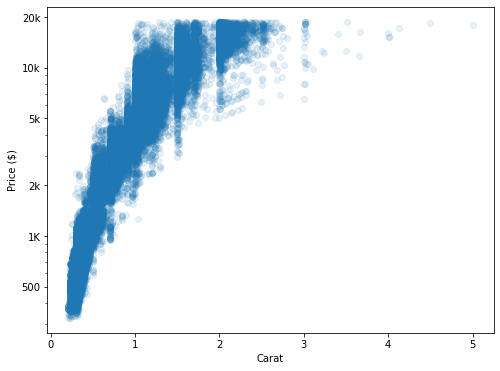

In [49]:
# scatter plot of price vs. carat, with log transform on price axis
plt.figure(figsize = [8,6])
plt.scatter(data = clear_dim, x = 'carat', y = 'price', alpha = 0.1)
plt.yscale('log')
plt.ylabel('Price ($)')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], ['500', '1K', '2k', '5k', '10k', '20k'])
plt.xlabel('Carat');

- Even after applying log scale on y axis the plot is not linear.
- we might want to also transform the 'carat' variable to see a linear trend. There also appears to be a price ceiling in the data


In [50]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [51]:
clear_dim['cr_carat'] = clear_dim['carat'].apply(cuberoot_trans)

<ipython-input-51-2972dbb10ade>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_dim['cr_carat'] = clear_dim['carat'].apply(cuberoot_trans)


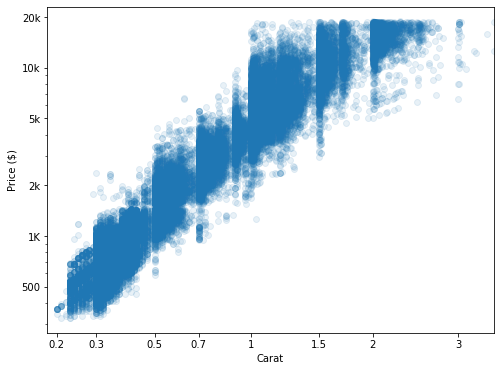

In [52]:
plt.figure(figsize = [8,6])
plt.scatter(data = clear_dim, x = 'cr_carat', y = 'price', alpha = 0.1)
plt.yscale('log')
plt.ylabel('Price ($)')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], ['500', '1K', '2k', '5k', '10k', '20k'])

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.xlabel('Carat');

Now, let's take a second look at the price and carat distributions on the three categorical variables: cut, color, and clarity.

In [53]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

clear_dim['log_price'] = clear_dim['price'].apply(log_trans)

<ipython-input-53-0703f43bad4e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_dim['log_price'] = clear_dim['price'].apply(log_trans)


In [54]:
clear_dim.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cr_carat,log_price
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.612693,2.513218
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.594392,2.513218
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.612693,2.514548
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.661911,2.523746
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.676790,2.525045


### Multivariant

In [55]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               [500, '1k', '2k', '5k', '10k', '20k'])

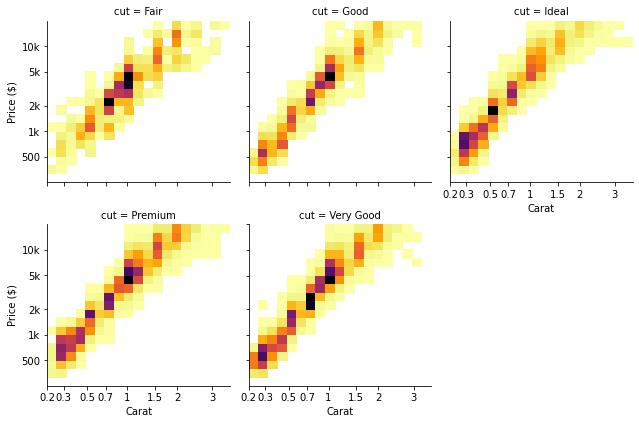

In [56]:
# create faceted heat maps on levels of the cut variable
g = sns.FacetGrid(data = clear_dim, col = 'cut', col_wrap = 3, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

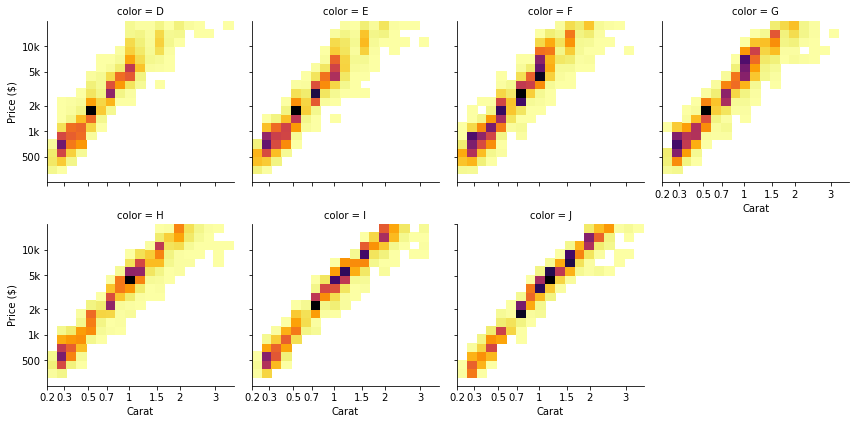

In [57]:
# create faceted heat maps on levels of the color variable
g = sns.FacetGrid(data = clear_dim, col = 'color', col_wrap = 4, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

C:\Users\AHamdan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


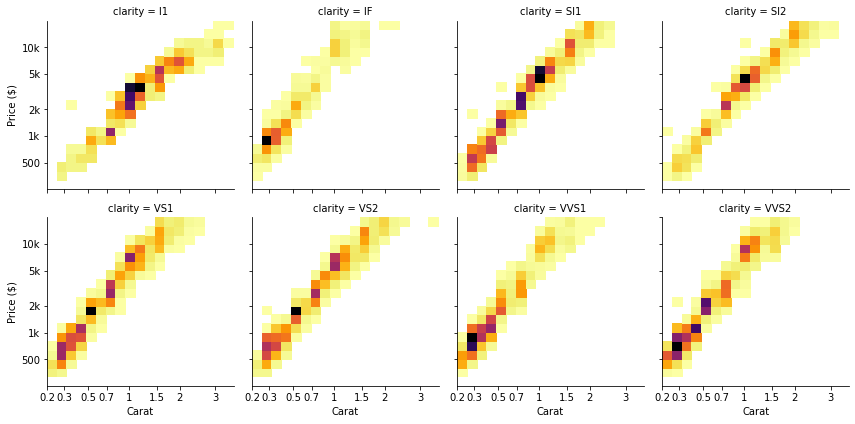

In [58]:
# create faceted heat maps on levels of the clarity variable
g = sns.FacetGrid(data = clear_dim, col = 'clarity', col_wrap = 4, size = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

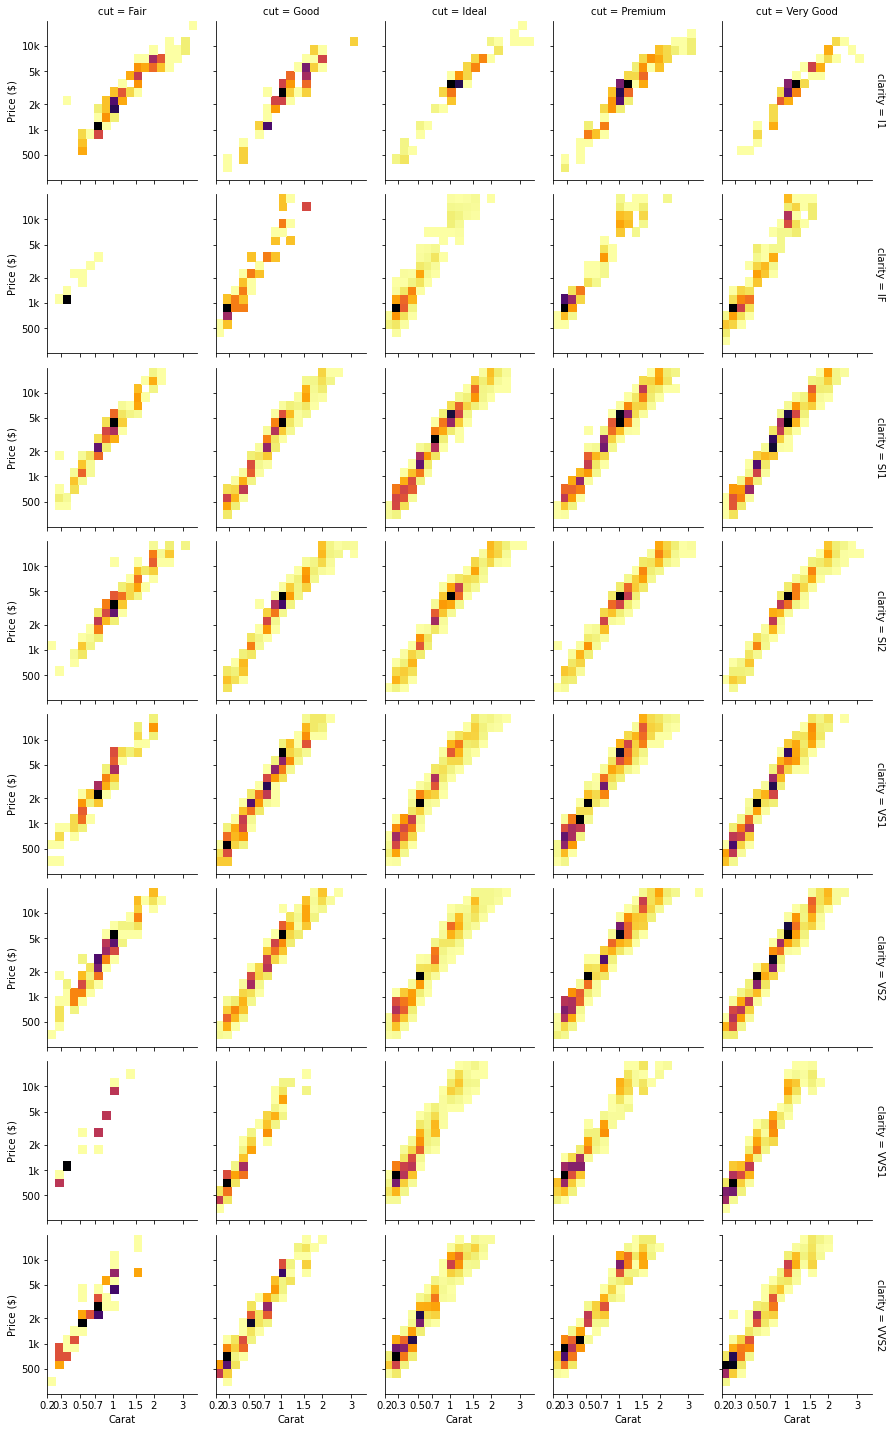

In [59]:
# create faceted heat maps on levels of cut and clarity
g = sns.FacetGrid(data = clear_dim, col = 'cut', row = 'clarity', size = 2.5,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)], margin_titles = True)
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

I tried looking at a faceted heat map across two quality dimensions, but it seems like there's too many facets to look at. Perhaps a better summary can come from looking at only diamonds of a specific carat size.


- since we have two beaks on the distipution of diamond carats (0.3 and 1) 
- Let's make the carat size is constant and check the realtion between price and other categorical variable

In [60]:
# select diamonds of approximately 1 carat

dim_1c= clear_dim[(clear_dim['carat'] >= 0.99) & (clear_dim['carat'] <= 1.03)]

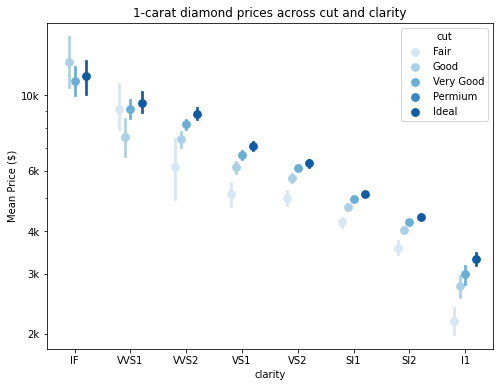

''

In [61]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = dim_1c, x= 'clarity', y = 'price', hue = 'cut', linestyles = '', 
                   palette = 'Blues', dodge = 0.4,
                  order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
                  hue_order = ['Fair', 'Good', 'Very Good', 'Permium', 'Ideal'])
plt.yscale('log')
plt.yticks([2e3,3e3, 4e3, 6e3, 1e4], ['2k', '3k', '4k', '6k', '10k'])

plt.title('1-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')
ax.grid(False)
plt.show()
;

In [62]:
# select diamonds of approximately 0.3 carat

dim_3c= clear_dim[(clear_dim['carat'] >= 0.29) & (clear_dim['carat'] <= 0.33)]

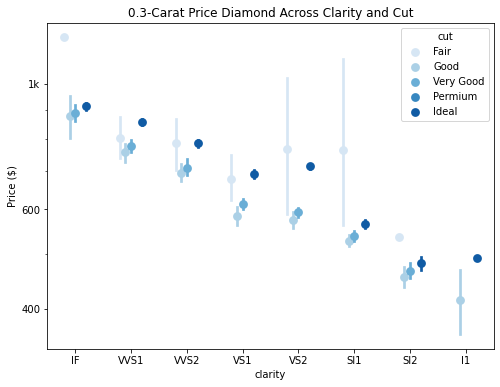

''

In [63]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = dim_3c, x= 'clarity', y = 'price', hue = 'cut', linestyles = '', 
                   palette = 'Blues', dodge = 0.4,
                  order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
                  hue_order = ['Fair', 'Good', 'Very Good', 'Permium', 'Ideal'])
plt.yscale('log')
plt.yticks([4e2, 6e2, 1e3], ['400', '600', '1k'])
ax.set_yticklabels([],minor = True)

plt.title('0.3-Carat Price Diamond Across Clarity and Cut')
plt.ylabel('Price ($)')
ax.grid(False)

plt.show()
;

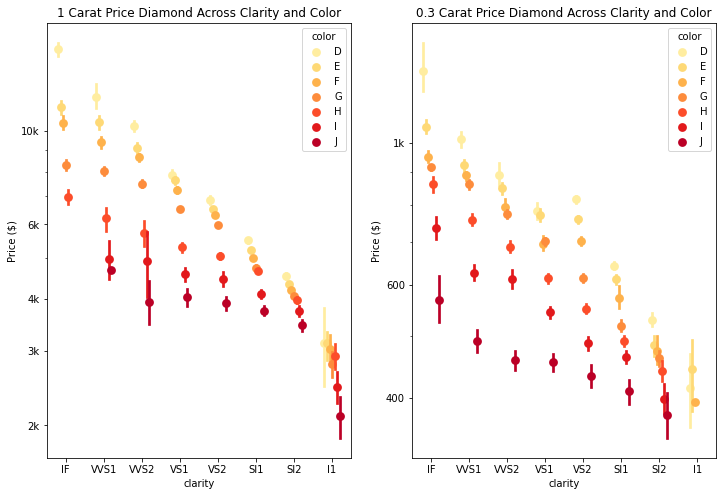

In [64]:
fig, ax = plt.subplots(ncols = 2 , figsize = [12,8])

sns.pointplot(data = dim_1c, x = 'clarity', y = 'price', hue = 'color', linestyles= "", 
              ax =ax[0], palette = 'YlOrRd', dodge = 0.4,
             order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'] )
ax[0].set_yscale('log')
ax[0].set_yticks([2e3, 3e3, 4e3, 6e3, 1e4])
ax[0].set_yticklabels(['2k', '3k', '4k', '6k' ,'10k'])
ax[0].set_title('1 Carat Price Diamond Across Clarity and Color')
ax[0].set_ylabel('Price ($)')
ax[0].set_yticklabels([],minor = True)
ax[0].grid(False)

sns.pointplot(data = dim_3c, x = 'clarity', y = 'price', hue = 'color', linestyles= "", 
              ax =ax[1], palette = 'YlOrRd', dodge = 0.4,
             order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'] )
ax[1].set_yscale('log')
ax[1].set_yticks([400, 600, 1e3])
ax[1].set_yticklabels(['400', '600', '1k'])
ax[1].set_title('0.3 Carat Price Diamond Across Clarity and Color')
ax[1].set_ylabel('Price ($)')
ax[1].set_yticklabels([],minor = True)
ax[1].grid(False)



The hierarchy in pricing by color is clear when clustered across clarity values. The pattern looks more systematic than the "cut by clarity" pointplots.


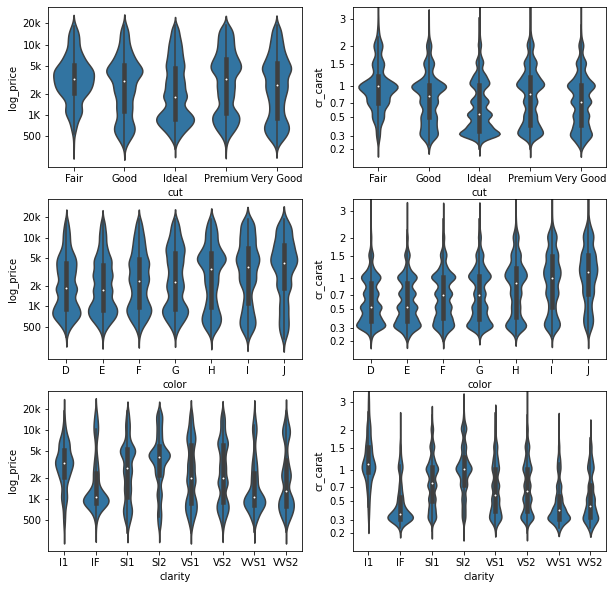

In [65]:
# plot matrix of numeric features against categorical features with different y scale

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]


fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = clear_dim, x= var , y = 'log_price',ax = ax[i,0], color = default_color)
    ax[i,0].set_yticks(log_trans([500, 1e3, 2e3, 5e3, 1e4, 2e4]))
    ax[i,0].set_yticklabels(['500', '1K', '2k', '5k', '10k', '20k'])
    
    sns.violinplot(data = clear_dim, x= var , y = 'cr_carat',ax = ax[i,1], color = default_color)
    ax[i,1].set_yticks([i ** (1/3) for i in carat_ticks])
    ax[i,1].set_yticklabels(carat_ticks)
    ax[i,1].set_ylim([i ** (1/3) for i in [0.1, 3.5]])

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the decrease in average price across increasing quality is due to the average diamond size decreasing with increasing quality. This is clearest in the plots across clarity, moderately visible with cut, and least evident with color. It will be interesting to see how the categories map in the multivariate analysis.
